## German Credit Risk Classification: Are you at Risk?

Debanjan Chowdhury Data 602

### Dataset

- The dataset used for this project was found at https://www.kaggle.com/kabure/german-credit-data-with-risk. 
- We made some references to another link where the same dataset was used and more description about each of the columns were mentioned in further details https://www.kaggle.com/uciml/german-credit/
- This dataset was inspired by the intial data in the UCI website: https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29
- This dataset ontains information about individuals in Germany who provided information about their bank account details, jobs, etc and according to UCI, the initial dataset was published by Professor Hoffman in the University of Hamburg.

## Research Question

When we use logistic regression, will the accuracy and overall scores of credit risk evaluation be larger or will it be larger when we use other classification models like decision tree and will it play a role when we modify the dataset like remove outliers?

### Importing potential libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Loading the dataset and reading it

In [3]:
df = pd.read_csv('german_credit_data.csv', index_col=0)

In [4]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


Some of the values in the columns with categorical values.

In [6]:
print('Values in Housing colummn:', df['Housing'].unique(), '\n')
print('Values in Housing colummn:', df['Saving accounts'].unique(), '\n')
print('Values in Housing colummn:', df['Purpose'].unique(), '\n')
print('Values in Housing colummn:', df['Risk'].unique())

Values in Housing colummn: ['own' 'free' 'rent'] 

Values in Housing colummn: [nan 'little' 'quite rich' 'rich' 'moderate'] 

Values in Housing colummn: ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others'] 

Values in Housing colummn: ['good' 'bad']


In [7]:
#1000 rows and 10 columns
print('Number of columns and rows: ', df.shape)

Number of columns and rows:  (1000, 10)


As we take a look at the datasets, we see the columns , age, sex, job, housing, etc. For the job section, we notice that they have added the unique values of 0, 1, 2, 3. According to UCI, 0 means that an individual is unemployed/ unskilled - non-resident, 1 means unskilled - resident, 2 means -skilled employee / official and 3 means - management/ self-employed/
highly qualified employee/ officer. (UCI)

In [5]:
##All items in the jobs
df['Job'].unique()

array([2, 1, 3, 0], dtype=int64)

## Data Cleaning

In [134]:
df.isna().sum()

Age                 0
Gender              0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [135]:
df = df.fillna("no acct")

We renamed the Sex Column to Gender as it seemed more appropriate. Also, we changed the data types of each the checking, savings and purpose to string.

In [136]:
df = df.astype({"Saving accounts": str, "Checking account": str, "Purpose": str})

In [137]:
df = df.rename(columns={"Sex": "Gender"})

In [138]:
df.head()

,Age,Gender,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,2,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,2,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0


## EDA(Exploratory Data Analysis)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001218CE4D370>,
      dtype=object)

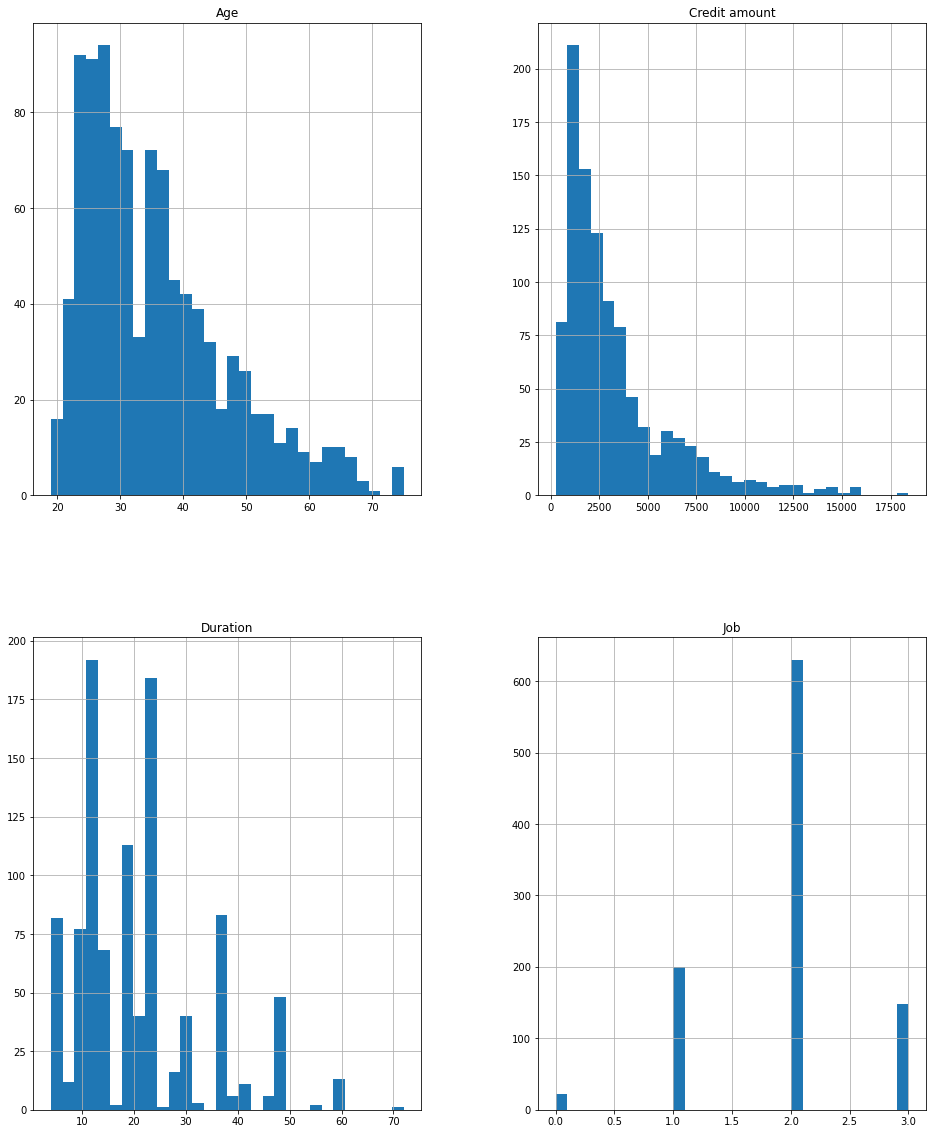

In [10]:
df.hist(figsize=(16,20), bins=30)

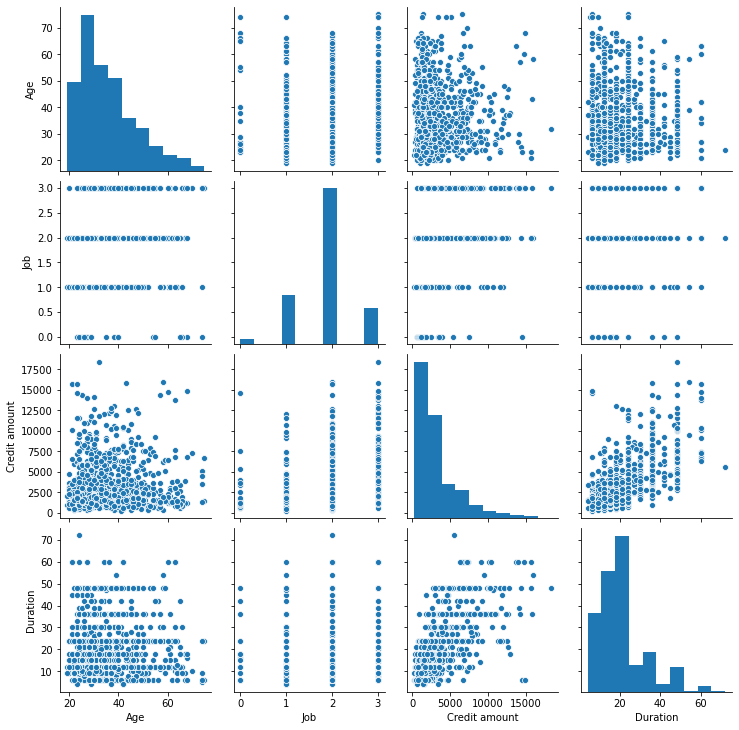

In [11]:
sns.pairplot(df)

 We can see that more individuals are on the "good" side in terms of risk or they are in the safer side. There are about 700 of them and about 300 are in the bad side or they would be representing the risks. 

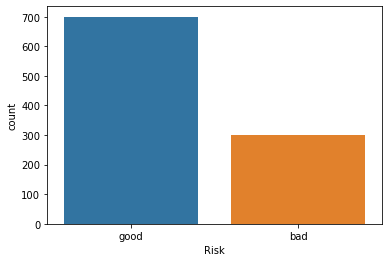

In [12]:
sns.countplot(x="Risk", data=df)

With the datasets in the checkings and savings accounts we can see some datasets that may seem like outliers who could play a role in the classificatin models later on. There is a significant about of individuals that have a samll amount in their savings account and there are a very few group of individuals who have a large amount of money in their savings account

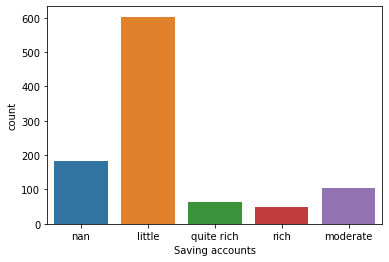

In [13]:
sns.countplot(x="Saving accounts", data=df)

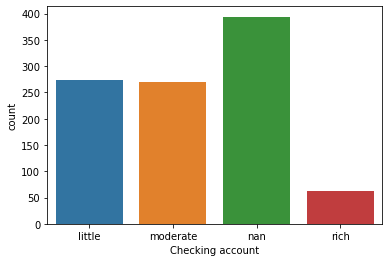

In [15]:
sns.countplot(x="Checking account", data=df)

The distribution plot below shows us that most individuals have a credit amount of 0 to 5,000.

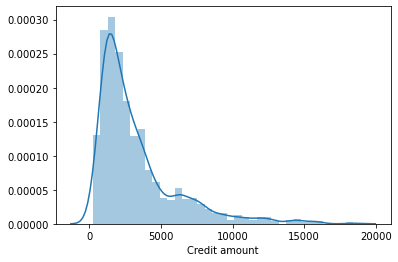

In [16]:
sns.distplot(df['Credit amount'], kde =True)

The box plot below shows that those who are in the risk zone seem to have a slightly higher credit amount.

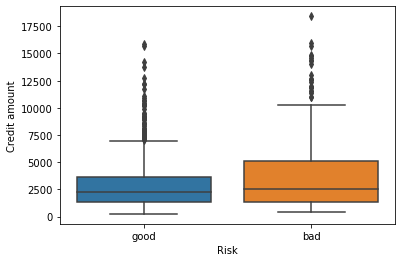

In [18]:
sns.boxplot('Risk', y= 'Credit amount', data= df)

## Feature Engineering


In [19]:
#Number of good and bad in risks for credit risks. This is target variable
df['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

Problem: 

- For a given users data we identify if the individual is is the good side meaning no credit risk or the bad sie meaning a credit risk.

Model Goal: 

- To develop a model with a higher accuracy score



In [20]:
"""
Dummy Accuracy score
We are checking ratio or Dummy model baseline accuracy rate
to evaluate if there is an imbalance between the two variables.
"""

700/(700+300)

0.7

We have a 70% ratio of individuals who are on the good side -no risk and 30% ratio of individuals who are on the bad side meaning risk.

In [21]:
#ratio of the "Goods and bads"
print("Ratio of good:", 700/(700+300))
print("Ratio of bad:", 300/(700+300))

Ratio of good: 0.7
Ratio of bad: 0.3


**Converting categorical to to dummy values using label encoding.**

In [32]:
from sklearn.preprocessing import LabelEncoder

Below are the label encoders where we initially fir the data to a specific column then we apply a transformation to convert all of the variables to numeric cateegorical values. We apply the transformtaiton values in each of the columns. 

In [33]:
le = LabelEncoder()
le.fit(df['Risk'])
y = le.transform(df['Risk'])
df['Risk'] = y

In [34]:
le.fit(df['Gender'])
x1 = le.transform(df['Gender'])
df['Gender'] = x1

In [35]:
le.fit(df['Housing'])
x2 = le.transform(df['Housing'])
df['Housing'] = x2

In [36]:
le.fit(df['Saving accounts'])
x3 = le.transform(df['Saving accounts'])
df['Saving accounts'] = x3

In [37]:
le.fit(df['Checking account'])
x4 = le.transform(df['Checking account'])
df['Checking account'] = x4

In [38]:
le.fit(df['Purpose'])
x5 = le.transform(df['Purpose'])
df['Purpose'] = x5

In [39]:
df.head()

,Age,Gender,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,2,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,2,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0


### Data Preparation

In [8]:
#train-test split
from sklearn.model_selection import train_test_split

In [9]:
x = df.drop(['Risk'], axis = 1)
y = df['Risk']

In [10]:
#We make sure train and test have same ratio of 
#good and bad risk cases so we use stratify

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

### Scaling Data

We are scaling the x datas of the feautres to ensure that they are all in the smae range of numbers or scaled into that range. Below, we import a scaler and declare a standard scaler or instantiate it. 

In [43]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

We would fit our scaler to the training data and then we would apply the scaling ot our traing and test data sets and store them in a new variable. 

In [44]:
std_scaler.fit(x_train)
x_train_scaled = std_scaler.transform(x_train)
x_test_scaled  = std_scaler.transform(x_test)

## Modeling & Model Evaluation

#### Logistics Regression

In [50]:
##We instantiate the logistic regression model and fit our model with training data
from sklearn.linear_model import LogisticRegression ## import model

logreg = LogisticRegression(penalty = 'none', random_state = 1) ## instantiate model --- Create model - Step 1
logreg.fit(x_train_scaled, y_train) ## fit model to data (learning) ##optimization problem solved - Step 2-3

LogisticRegression(penalty='none', random_state=1)

In [51]:
##Model Prediction and Score
predictions = logreg.predict(x_train_scaled)
score = logreg.score(x_train_scaled, y_train)

In [52]:
##We create a confusion matrix to show true positive, false positive, etc. 
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

cm = metrics.confusion_matrix(y_train, predictions)
cm

array([[ 85, 156],
       [ 59, 500]], dtype=int64)

**Below: We are displaying a visualization of the Confusion matrix for the training datasets**

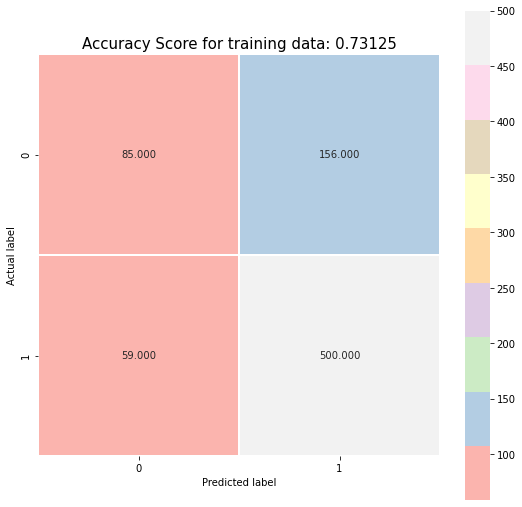

In [77]:
##Confusion Matrix visualization
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for training data: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()

**Below are the accuracy, precision and recall scores of all of the datas.**

In [78]:
print('Log reg accruacy score:', accuracy_score(y_train, predictions))
print('Log reg precision score:', precision_score(y_train, predictions))
print('Log reg recall score:', recall_score(y_train, predictions))

Log reg accruacy score: 0.73125
Log reg precision score: 0.7621951219512195
Log reg recall score: 0.8944543828264758


- The accuracy is calculated by dividing the correct prediction amount by the number of total cases.
- Then the precision is calculated by the number of true positives by the number of condition positives (sum of the true positive and alse negative). 
- The recall is the division of the true positives with the number of predicted positives (sum of true and false postives).

**Cross Validation for Logistics Regression**

We use this to cross validate our model results to understand where the possible issues could exist in

In [79]:
from sklearn.model_selection import cross_validate

We are doing 5 splittings when we are doing cross validations. We set the x values as scaled training values, set the y as y training value also we for it to return training score and return the estimator. We set the verbose is 2 for the machine to show us what is going on. 

cv_fivefold = cross_validate(estimator= logreg, 
                             X = x_train_scaled,
                             y = y_train,
                             cv = 5,
                             return_train_score= True, 
                             return_estimator= True, 
                             verbose = 2)

This is the cross validation data of our training scores

In [80]:
cv_fivefold = cross_validate(estimator= logreg, 
                             X = x_train_scaled,
                             y = y_train,
                             cv = 5,
                             return_train_score= True, 
                             return_estimator= True, 
                             verbose = 2)

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [81]:
cv_fivefold['train_score']

array([0.7375  , 0.740625, 0.7375  , 0.71875 , 0.728125])

This is the cross validation data of our test scores

In [82]:
cv_fivefold['test_score']

array([0.70625, 0.74375, 0.6875 , 0.7625 , 0.75   ])

Over here, we find the mean of the validation and the standard deviation to verify the overall model accuracy. Baseline summary of logistic regressions without any type of regularization. Our mean is around 73% and there is a standard devaition of about 0.028

In [83]:
validation_mean = cv_fivefold['test_score'].mean()

validation_std = cv_fivefold['test_score'].std()

print('Logistic Regression without regularization 5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean, validation_std))

Logistic Regression without regularization 5-fold cv results (Accuracy) 0.730 =/- 0.028


### Decision tree

The main goal of the decision tree is when they take predictor space and break it into a number of different regions. We would break each of the individual datasets in the columnd to smaller parts like if we have a dataset columnd calculating the income. We would evalaute if the income is larger than a specific number and then we would continue to the next node of the tree from the root node if it is and if not then we would not continue. Then we would continue to the terminal node from root node. The last nodes (when we cannot go to the next node and no more conitions exist), we reach the leaf nodes. 

In [96]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state = 1)
clf.fit(x_train_scaled, y_train)


DecisionTreeClassifier(max_leaf_nodes=10, random_state=1)

In [99]:
score_dt = clf.score(x_train_scaled, y_train)
prediction_dt = clf.predict(x_train_scaled)

In [100]:
cm_dt = metrics.confusion_matrix(y_train, prediction_dt)
cm_dt

array([[167,  74],
       [128, 431]], dtype=int64)

**Below: We are displaying a visualization of the Confusion matrix for the training datasets**

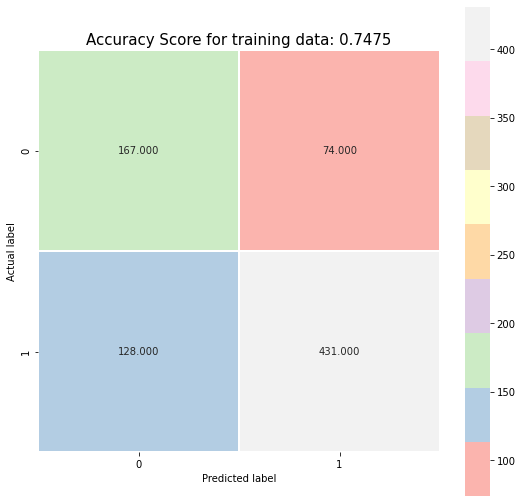

In [90]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_dt, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for training data: {0}'.format(score_dt)
plt.title(all_sample_title, size = 15);
plt.show()

**In the confusion matrix above, we notice that the score is about 75 rounded% accurate. That couls indicate that it is correct and accurate most of the time, but about 25 percent rounded of the time it would be incorrect. This is slightly higher than the rate for logistics regression. This time we have the most true negatives and true positives. Then we have some false postitives and negatives as well, but unlike log regression the true negatives are not the second highest.**

In [107]:
print('Dec tree accruacy score:', accuracy_score(y_train, prediction_dt))
print('Dec tree precision score:', precision_score(y_train, prediction_dt))
print('Dec tree recall score:', recall_score(y_train, prediction_dt))

Dec tree accruacy score: 0.7475
Dec tree precision score: 0.8534653465346534
Dec tree recall score: 0.7710196779964222


Above, we have the accuracy, precision and the recall scores of the model using decision tree. The accuracy and the precision scores are higher, but the recall score is lower.

**Cross Validation for Decision tree**

In [108]:
cv_fivefold_dt = cross_validate(estimator= clf, 
                             X = x_train_scaled,
                             y = y_train,
                             cv = 5,
                             return_train_score= True, 
                             return_estimator= True, 
                             verbose = 2)

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


This is the cross validation data of our train scores

In [109]:
cv_fivefold_dt['train_score']

array([0.7640625, 0.765625 , 0.7984375, 0.771875 , 0.775    ])

This is the cross validation data of our test scores

In [110]:
cv_fivefold_dt['test_score']

array([0.7625 , 0.7125 , 0.6875 , 0.7375 , 0.74375])

In [111]:
dt_validation_mean = cv_fivefold_dt['test_score'].mean()

dt_validation_std = cv_fivefold_dt['test_score'].std()

print('Decision tree 5-fold cv results (Accuracy) %.3f =/- %.3f'%(dt_validation_mean, dt_validation_std))

Decision tree 5-fold cv results (Accuracy) 0.729 =/- 0.026


**Checking the values after removing the outliers.**

In [112]:
df_new = df.copy()
df_new.head()

,Age,Gender,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,2,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,2,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0


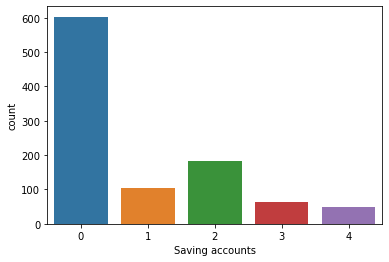

In [122]:
sns.countplot(x="Saving accounts", data=df)

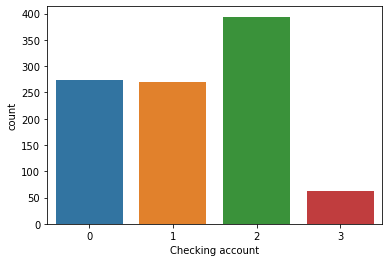

In [123]:
sns.countplot(x="Checking account", data=df)

- **As we can see in the previous two count plots, where the savings account would be a value of 1 is an outlier for all savings account related data and where the checking account would be a value of 3 would be the outlier as those two values are far off from the rest of the datasets.** 
- **Therefore, in the example below, we drop all rows that may have either of those two conditions and update the dataframe.**

In [124]:
index = df_new[(df_new['Checking account'] == 3) | (df_new['Saving accounts'] == 1)].index
df_new.drop(index, inplace=True)

In [125]:
x2 = df_new.drop(['Risk'], axis = 1)
y2 = df_new['Risk']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=1)


std_scaler.fit(x2_train)
x2_train_scaled = std_scaler.transform(x2_train)
x2_test_scaled  = std_scaler.transform(x2_test)

lr = LogisticRegression(penalty = 'none' , max_iter= 10000)
lr.fit(x2_train_scaled, y2_train)
score = lr.score(x2_train_scaled, y2_train)
pred = lr.predict(x2_train_scaled)

cm = metrics.confusion_matrix(y2_train, pred)
cm

array([[ 82, 123],
       [ 54, 412]], dtype=int64)

**Above is the confusion matrix for logistic regression of the training dataset after removing the outliers from savings and checkings account columns.**

In [127]:
print('accruacy score:', accuracy_score(y2_train, pred))
print('precision score:', precision_score(y2_train, pred))
print('recall score:', recall_score(y2_train, pred))

accruacy score: 0.736214605067064
precision score: 0.7700934579439253
recall score: 0.8841201716738197


In [128]:
clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state = 1)
clf.fit(x2_train_scaled, y2_train)

score_dt = clf.score(x2_train_scaled, y2_train)
pred_dt = clf.predict(x2_train_scaled)

cm_dt = metrics.confusion_matrix(y2_train, pred_dt)
cm_dt

array([[106,  99],
       [ 46, 420]], dtype=int64)

Above is the confusion matrix for the decision tree model without the outliers in savings and checkings column.

In [129]:
print('accruacy score:', accuracy_score(y2_train, pred_dt))
print('precision score:', precision_score(y2_train, pred_dt))
print('Drecall score:', recall_score(y2_train, pred_dt))

accruacy score: 0.7839046199701938
precision score: 0.8092485549132948
Drecall score: 0.9012875536480687


### Model Selection and Evaluation

In [222]:
clf.fit(x_train_scaled, y_train)
dt_score = clf.score(x_train_scaled, y_train)
dt_pred = clf.predict(x_train_scaled)

In [223]:
dt_score

0.7475

In [229]:
dt_cm = metrics.confusion_matrix(y_train, dt_pred)
dt_cm

array([[167,  74],
       [128, 431]], dtype=int64)

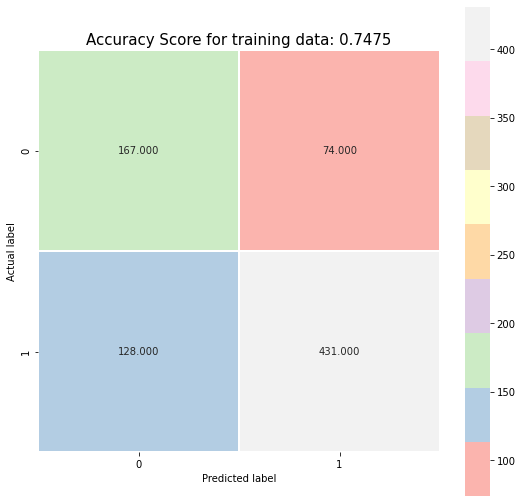

In [226]:
plt.figure(figsize=(9,9))
sns.heatmap(dt_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for training data: {0}'.format(dt_score)
plt.title(all_sample_title, size = 15);
plt.show()

In [211]:
logreg.fit(x_train_scaled, y_train) 
score_log = logreg.score(x_train_scaled, y_train)
pred_log = logreg.predict(x_train_scaled)

In [213]:
score_log

0.73125

In [228]:
cm_log = metrics.confusion_matrix(y_train, pred_log)
cm_log

array([[ 85, 156],
       [ 59, 500]], dtype=int64)

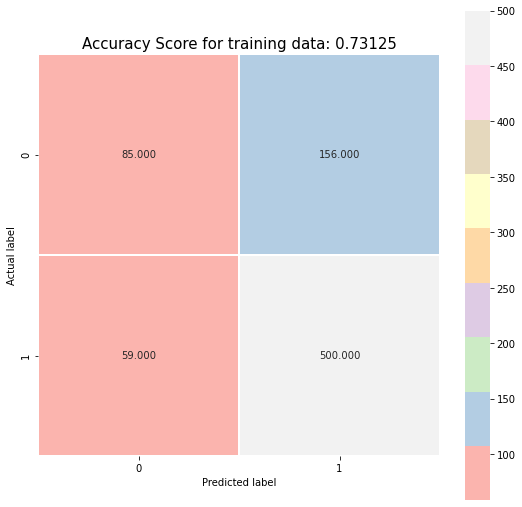

In [227]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_log, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for training data: {0}'.format(score_log)
plt.title(all_sample_title, size = 15);
plt.show()

In [133]:
print('Dec tree accruacy score:', accuracy_score(y_train, prediction_dt))
print('Dec tree precision score:', precision_score(y_train, prediction_dt))
print('Dec tree recall score:', recall_score(y_train, prediction_dt))


print('Log reg accruacy score:', accuracy_score(y_train, predictions))
print('Log reg precision score:', precision_score(y_train, predictions))
print('Log reg recall score:', recall_score(y_train, predictions))

Log reg accruacy score: 0.73125
Log reg precision score: 0.7621951219512195
Log reg recall score: 0.8944543828264758
Dec tree accruacy score: 0.7475
Dec tree precision score: 0.8534653465346534
Dec tree recall score: 0.7710196779964222


**We  are evaluating the scores after removing the main outliers from the checkings and savings account columns.**

**Showing the accuracy, precision, and recall scores for all of our original dataset and the dataset after removing outliers**

In [132]:
print('Log reg accruacy score:', accuracy_score(y_train, predictions))
print('Log reg precision score:', precision_score(y_train, predictions))
print('Log reg recall score:', recall_score(y_train, predictions))

print('Dec tree accruacy score:', accuracy_score(y_train, prediction_dt))
print('Dec tree precision score:', precision_score(y_train, prediction_dt))
print('Dec tree recall score:', recall_score(y_train, prediction_dt))


###Scores after outliers are removed:
print('\n')
print('Log reg accruacy score without outliers:', accuracy_score(y2_train, pred))
print('Log reg precision score without outliers:', precision_score(y2_train, pred))
print('Log reg recall score without outliers:', recall_score(y2_train, pred))


print('Dec tree accruacy score without outliers:', accuracy_score(y2_train, pred_dt))
print('Dec tree precision score without outliers:', precision_score(y2_train, pred_dt))
print('Dec tree Recall score without outliers:', recall_score(y2_train, pred_dt))

Log reg accruacy score: 0.73125
Log reg precision score: 0.7621951219512195
Log reg recall score: 0.8944543828264758
Dec tree accruacy score: 0.7475
Dec tree precision score: 0.8534653465346534
Dec tree recall score: 0.7710196779964222


Log reg accruacy score without outliers: 0.736214605067064
Log reg precision score without outliers: 0.7700934579439253
Log reg recall score without outliers: 0.8841201716738197
Dec tree accruacy score without outliers: 0.7839046199701938
Dec tree precision score without outliers: 0.8092485549132948
Dec tree Recall score without outliers: 0.9012875536480687


## Limitation and Future work

Some of the things taht I would like to try in the long run is possibly consider using many more calssification model to see how the accuracy scores could be reflected in each. Along with that, I also would like to see how a job title or role of an individual play an effect on how the overall credit scores and the risk and it would be great if the dataset provides those details.
Adittionally, instead of removing the outliers from two columns, I could try removing outliers from the overall dataset compare the results with the initial mode. I also could use a higher max leaf node for the decision tree model and see if that would pray a role in modelling and the accuracy scores. It would be interesting to see that in the future. I would also want to try different methods to ensure that I can reach around 90-95% range when I develop models as that it is not good if you are in credit risk but do not know about it. 

## References and contributions

- Dataset: https://www.kaggle.com/kabure/german-credit-data-with-risk.
- Referred to: https://www.kaggle.com/uciml/german-credit
- Dataset inspired by: https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29.
- https://www.cnbc.com/2019/01/04/about-4-in-10-americans-have-no-idea-how-credit-scores-are-determined.html
- https://www.investopedia.com/the-side-effects-of-bad-credit-4769783#:~:text=Poor%20credit%20can%20make%20it,%2C%20renter's%2C%20and%20homeowner's%20insurance.